In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
# Load the dataset
data = pd.read_csv('AfSmote_Data.csv')

data.head()


,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,45,3,3,2,39,5,1,3,12691.0,777,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
1,49,5,2,4,44,6,1,2,8256.0,864,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
2,51,3,2,3,36,4,1,0,3418.0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,40,4,3,4,34,3,4,1,3313.0,2517,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
4,40,3,5,2,21,5,1,0,4716.0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1


To maintain consistency and efficiency in our modeling process, I will leverage the feature set selected from the previous Decision Tree model for this SVM implementation. This approach allows us to bypass the feature selection phase, ensuring a direct and focused application of the previously validated features to the SVM model. By using this refined set of features, we aim to enhance the SVM's performance without redundant feature selection, streamlining the development and optimization of the model.

In [ ]:

# Define features and target
features = [
    'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1',
    'Total_Relationship_Count', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1',
    'Credit_Limit', 'Gender_F', 'Income_Category', 'Card_Category_Blue',
    'Avg_Open_To_Buy', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt'
]
target = 'Attrition_Flag'





In [ ]:
# Filter dataset for features and target
data = data[features + [target]]

data.head()

,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Credit_Limit,Gender_F,Income_Category,Card_Category_Blue,Avg_Open_To_Buy,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt,Attrition_Flag
0,42,777,1.625,5,0.061,1.335,12691.0,0.0,2,1.0,11914.0,1,3,1144,1
1,33,864,3.714,6,0.105,1.541,8256.0,1.0,4,1.0,7392.0,1,2,1291,1
2,20,0,2.333,4,0.000,2.594,3418.0,0.0,3,1.0,3418.0,1,0,1887,1
3,20,2517,2.333,3,0.760,1.405,3313.0,1.0,4,1.0,796.0,4,1,1171,1
4,28,0,2.500,5,0.000,2.175,4716.0,0.0,2,1.0,4716.0,1,0,816,1


In [ ]:
# Split dataset into training, validation, and testing sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()





Linear SVM Accuracy: 0.8490196078431372


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


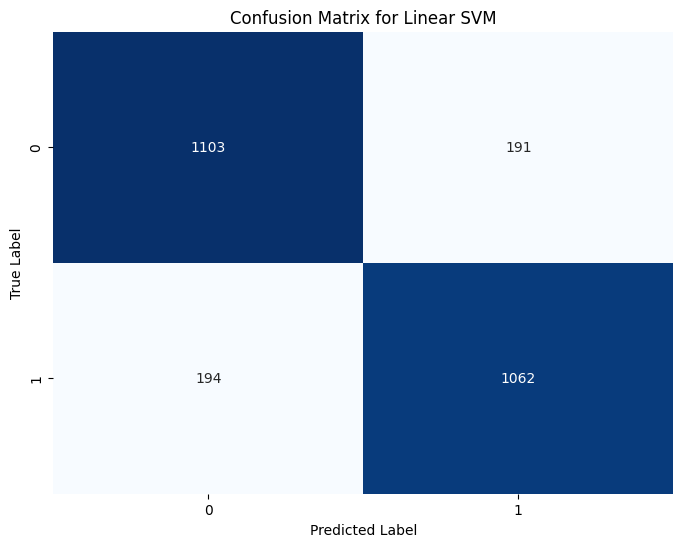

In [ ]:

# Initialize and train the Linear SVM
linear_svm = LinearSVC(C=50, random_state=42)
linear_svm.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = linear_svm.predict(X_test_scaled)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred))
cm_linear = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_linear, title='Confusion Matrix for Linear SVM')


RBF SVM Accuracy: 0.956078431372549


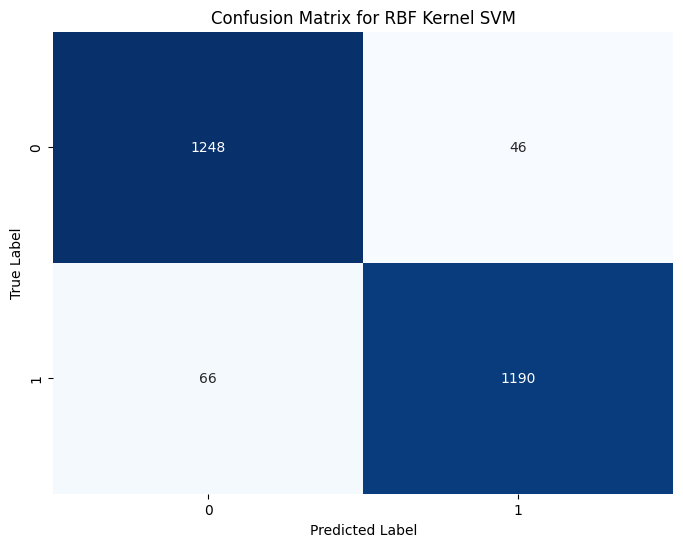

In [ ]:
# Initialize and train the RBF kernel SVM
rbf_svm = SVC(C=10, kernel='rbf', gamma='auto', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_rbf = rbf_svm.predict(X_test_scaled)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plot_confusion_matrix(cm_rbf, title='Confusion Matrix for RBF Kernel SVM')

[LibSVM]Polynomial SVM Accuracy: 0.9309803921568628


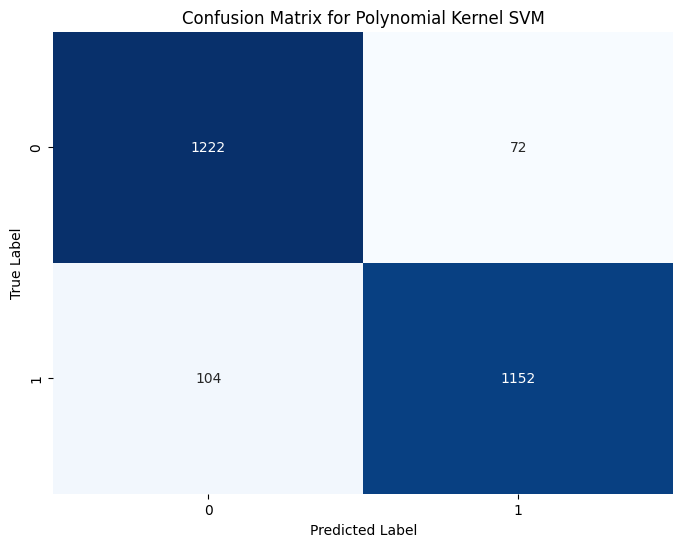

In [ ]:
# Initialize and train the Polynomial kernel SVM
poly_svm = SVC(C=10, kernel='poly', degree=3, gamma='auto', verbose=True, random_state=42)
poly_svm.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_poly = poly_svm.predict(X_test_scaled)
print("Polynomial SVM Accuracy:", accuracy_score(y_test, y_pred_poly))
cm_poly = confusion_matrix(y_test, y_pred_poly)
plot_confusion_matrix(cm_poly, title='Confusion Matrix for Polynomial Kernel SVM')

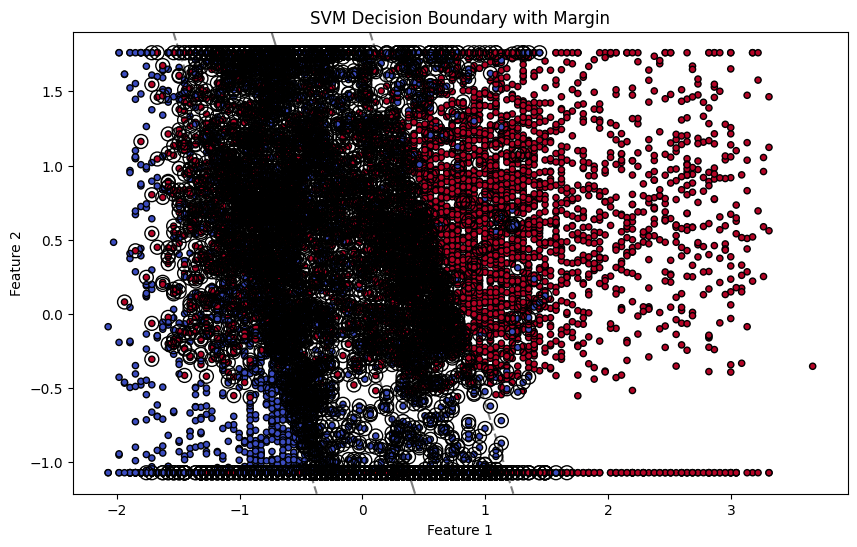

In [ ]:


# Define and fit the model
clf = SVC(kernel="linear", C=1)
clf.fit(X_train_scaled[:, :2], y_train)  # Use only two features for visualization

# Plotting setup
plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Plot decision boundary and margins
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Margin')
plt.show()
